## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mice_count = len(combined_data["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
check_duplicate = combined_data[combined_data.duplicated(keep=False)]
check_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_records = combined_data.loc[combined_data["Mouse ID"] == "g989",]
duplicated_records

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.loc[combined_data["Mouse ID"] != "g989",]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = len(cleaned_data["Mouse ID"].unique())
cleaned_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_regimen = cleaned_data.groupby("Drug Regimen")
tumor_volume_mean = groupby_regimen["Tumor Volume (mm3)"].mean()
tumor_volume_median = groupby_regimen["Tumor Volume (mm3)"].median()
tumor_volume_var = groupby_regimen["Tumor Volume (mm3)"].var()
tumor_volume_stddev = groupby_regimen["Tumor Volume (mm3)"].std()
tumor_volume_sem = groupby_regimen["Tumor Volume (mm3)"].sem()
summary_table = pd.DataFrame({"Mean Tumor Volume":tumor_volume_mean,
                              "Median Tumor Volume":tumor_volume_median,
                              "Tumor Volume Variance":tumor_volume_var,
                              "Tumor Volume Std.Dev.":tumor_volume_stddev,
                              "Tumor Volume Std.Err.":tumor_volume_sem,
                             })
summary_table
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table_2 = groupby_regimen.agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})
summary_table_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

Text(0, 0.5, 'Number of Data Points')

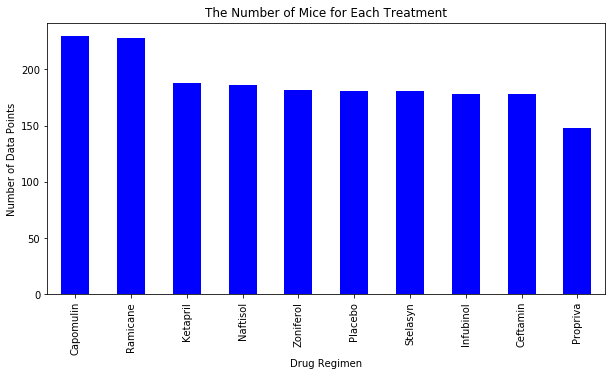

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mouse_per_regimen = cleaned_data["Drug Regimen"].value_counts()
mouse_per_regimen.plot(kind="bar",color="blue",figsize=(10,5))
plt.title("The Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

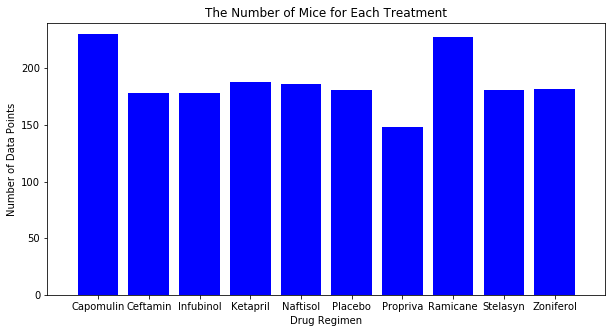

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
bar_df = cleaned_data[["Mouse ID", "Drug Regimen"]].groupby("Drug Regimen").count()
bar_x_axis = [value for value in bar_df.index]
bar_y_axis = [value for value in bar_df["Mouse ID"]]
plt.figure(figsize=(10,5))
plt.xlim(-1, len(bar_x_axis))
plt.ylim(0, max(bar_y_axis)+10)
plt.title("The Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.bar(bar_x_axis, bar_y_axis, color="b", align="center",)
plt.show()

## Pie Plots

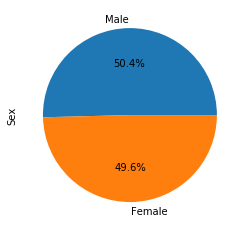

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
cleaned_mouse_metadata = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989",]
gender_mice_data = cleaned_mouse_metadata["Sex"].value_counts()
gender_mice_data.plot(kind="pie",autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x1a1cd94e50>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

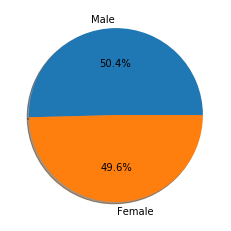

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_labels = [value for value in gender_mice_data.index]
pie_sizes = [value for value in gender_mice_data]
plt.pie(pie_sizes, autopct="%1.1f%%", labels=pie_labels,shadow=True, startangle=0)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_timepoint = cleaned_data["Timepoint"].max()
capomulin_final_df = cleaned_data.loc[(cleaned_data["Drug Regimen"]=="Capomulin") & (cleaned_data["Timepoint"]==final_timepoint),]
capomulin_final_volume = capomulin_final_df["Tumor Volume (mm3)"]

capomulin_quartiles = capomulin_final_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

capomulin_outliers = capomulin_final_volume.loc[(capomulin_final_volume > capomulin_upper_bound)]
capomulin_outliers = capomulin_final_volume.loc[(capomulin_final_volume < capomulin_lower_bound)]
capomulin_outliers
    


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [14]:
ramicane_final_df = cleaned_data.loc[(cleaned_data["Drug Regimen"]=="Ramicane") & (cleaned_data["Timepoint"]==final_timepoint),]
ramicane_final_volume = ramicane_final_df["Tumor Volume (mm3)"]

ramicane_quartiles = ramicane_final_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

ramicane_outliers = ramicane_final_volume.loc[(ramicane_final_volume > ramicane_upper_bound)]
ramicane_outliers = ramicane_final_volume.loc[(ramicane_final_volume < ramicane_lower_bound)]
ramicane_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [15]:
infubinol_final_df = cleaned_data.loc[(cleaned_data["Drug Regimen"]=="Infubinol") & (cleaned_data["Timepoint"]==final_timepoint),]
infubinol_final_volume = infubinol_final_df["Tumor Volume (mm3)"]

infubinol_quartiles = infubinol_final_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

infubinol_outliers = infubinol_final_volume.loc[(infubinol_final_volume > infubinol_upper_bound)]
infubinol_outliers = infubinol_final_volume.loc[(infubinol_final_volume < infubinol_lower_bound)]
infubinol_outliers

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [16]:
ceftamin_final_df = cleaned_data.loc[(cleaned_data["Drug Regimen"]=="Ceftamin") & (cleaned_data["Timepoint"]==final_timepoint),]
ceftamin_final_volume = ceftamin_final_df["Tumor Volume (mm3)"]

ceftamin_quartiles = ceftamin_final_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

ceftamin_outliers = ceftamin_final_volume.loc[(ceftamin_final_volume > ceftamin_upper_bound)]
ceftamin_outliers = ceftamin_final_volume.loc[(ceftamin_final_volume < ceftamin_lower_bound)]
ceftamin_outliers


Series([], Name: Tumor Volume (mm3), dtype: float64)

Text(0, 0.5, 'Final Tumor Volume (mm3)')

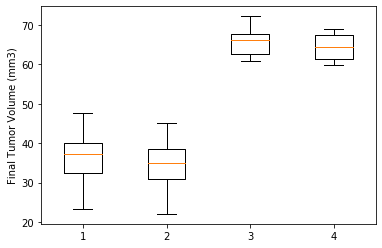

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_final_volume = capomulin_final_df["Tumor Volume (mm3)"]
ramicane_final_volume = ramicane_final_df["Tumor Volume (mm3)"]
infubinol_final_volume = infubinol_final_df["Tumor Volume (mm3)"]
ceftamin_final_volume = ceftamin_final_df["Tumor Volume (mm3)"]

#capomulin.set_ylabel('Final Tumor Volume (mm3)')
plt.boxplot([capomulin_final_volume,ramicane_final_volume,infubinol_final_volume,ceftamin_final_volume])
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

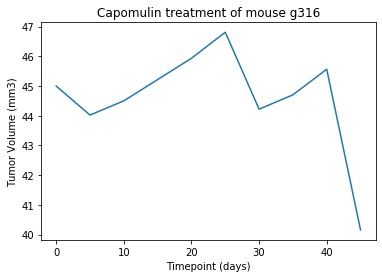

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = cleaned_data.loc[(cleaned_data["Drug Regimen"]=="Capomulin"),]
capomulin_mice = capomulin_df["Mouse ID"].unique()
capomulin_mice_g316 = capomulin_df.loc[capomulin_df["Mouse ID"]=="g316",["Timepoint","Tumor Volume (mm3)"]]
capomulin_mice_g316.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)",legend=None)
plt.title("Capomulin treatment of mouse g316")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

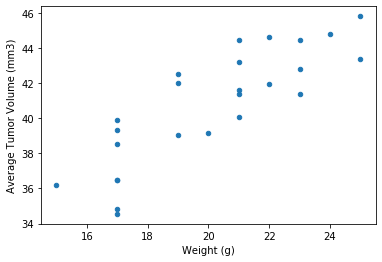

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_avg_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_avg_tumor_df = pd.DataFrame({"mean":capomulin_avg_tumor})
capomulin_weight_df = capomulin_df[["Mouse ID","Weight (g)"]].drop_duplicates()
combined_capomulin_data = pd.merge(capomulin_weight_df, capomulin_avg_tumor_df, on="Mouse ID")
combined_capomulin_data.plot(kind="scatter",x="Weight (g)", y="mean")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#grouped_capomulin_df.plot(kind="scatter",x="Weight (g)" )

## Correlation and Regression

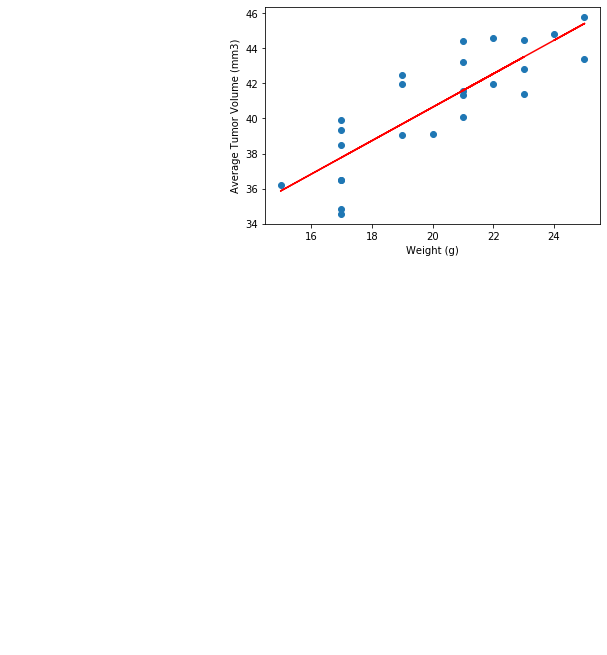

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation = sts.pearsonr(combined_capomulin_data["Weight (g)"],combined_capomulin_data["mean"])
#correlation[0]

x_values = combined_capomulin_data["Weight (g)"]
y_values = combined_capomulin_data["mean"]
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()